In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn import datasets
import seaborn as sns

### Задача:
Скачать Ирисы Фишера
Рассчитать среднее, медиану, стандартное отклонение переменных, в том числе в разрезе классов (заполнить таблицу ниже)
Найти корреляцию между переменными
Прислать решение в виде скрипта R или Python

In [2]:
iris = datasets.load_iris()
print iris.DESCR
iris_frame = pd.DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Заполнить следующую таблицу:			
			
#### Класс	Переменная	Параметр	Значение
#### Все классы	Sepal length	среднее	
#### Iris setosa	Sepal width	медиана	
#### **	**	**	**


In [45]:
a = [[i, 'Все классы', "среднее", iris_frame[i].mean()],
     [i, 'Все классы', "медиана", iris_frame[i].median()],
     [i, 'Все классы', "ст.откл.", iris_frame[i].std()]]
df = pd.DataFrame(a)

In [46]:
names = list(set(iris.target_names))
print names
for i in iris.feature_names:
    for y in set(iris.target):
        #print i, names[y], "среднее", iris_frame[iris_frame.target==y][i].mean()
        a = [[i, names[y], "среднее", iris_frame[iris_frame.target==y][i].mean()]]
        #print a
        df = df.append(a)
        #print i, names[y], "медиана", iris_frame[iris_frame.target==y][i].median()
        a = [[i, names[y], "медиана", iris_frame[iris_frame.target==y][i].median()]]
        df = df.append(a)
        #print i, names[y], "ст.откл.", iris_frame[iris_frame.target==y][i].std()
        a = [[i, names[y], "ст.откл.", iris_frame[iris_frame.target==y][i].std()]]
        df = df.append(a)

['setosa', 'versicolor', 'virginica']
[['sepal length (cm)', 'setosa', '\xd1\x81\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbd\xd0\xb5\xd0\xb5', 5.005999999999999]]
[['sepal length (cm)', 'versicolor', '\xd1\x81\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbd\xd0\xb5\xd0\xb5', 5.936]]
[['sepal length (cm)', 'virginica', '\xd1\x81\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbd\xd0\xb5\xd0\xb5', 6.587999999999998]]
[['sepal width (cm)', 'setosa', '\xd1\x81\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbd\xd0\xb5\xd0\xb5', 3.4180000000000006]]
[['sepal width (cm)', 'versicolor', '\xd1\x81\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbd\xd0\xb5\xd0\xb5', 2.7700000000000005]]
[['sepal width (cm)', 'virginica', '\xd1\x81\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbd\xd0\xb5\xd0\xb5', 2.9739999999999998]]
[['petal length (cm)', 'setosa', '\xd1\x81\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbd\xd0\xb5\xd0\xb5', 1.464]]
[['petal length (cm)', 'versicolor', '\xd1\x81\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbd\xd0\xb5\xd0\xb5', 4.26]]
[['petal length (cm)', 'virginica', '\xd1\x81\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbd

### Рассчитать среднее, медиану, стандартное отклонение переменных, в том числе в разрезе классов (заполнить таблицу ниже) 

In [47]:
df

,0,1,2,3
0,petal width (cm),Все классы,среднее,1.198667
1,petal width (cm),Все классы,медиана,1.300000
2,petal width (cm),Все классы,ст.откл.,0.763161
0,sepal length (cm),setosa,среднее,5.006000
0,sepal length (cm),setosa,медиана,5.000000
0,sepal length (cm),setosa,ст.откл.,0.352490
0,sepal length (cm),versicolor,среднее,5.936000
0,sepal length (cm),versicolor,медиана,5.900000
0,sepal length (cm),versicolor,ст.откл.,0.516171
0,sepal length (cm),virginica,среднее,6.588000


### Найти корреляцию между переменными 

In [48]:
iris_frame.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


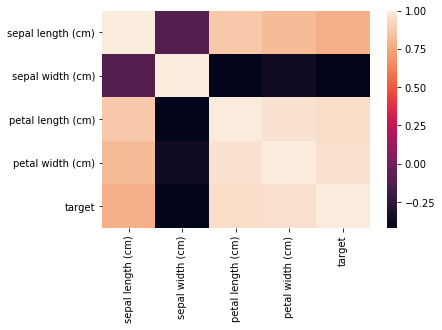

In [50]:
sns.heatmap(iris_frame.corr())